<a href="https://colab.research.google.com/github/rodrigoviannini/Machine-Learning/blob/main/Aula_19_interpretabilidade_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula  19 - interpretabilidade de modelos

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Interpretabilidade de modelos
- 2) Modelos naturalmente interpretáveis
- 3) LIME
- 4) SHAP

Para a parte prática da aula, precisaremos de algumas bibliotecas adicionais:

`!pip install lime`

`!pip install shap`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    print(confusion_matrix(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))

    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    print(confusion_matrix(y_test, y_pred_test))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))

____
____
____

## 1) Interpretabilidade de modelos

Nesta altura, já entendemos bem **o que** é um modelo, e como podemos construir modelos dos mais variados tipos.

Muitas vezes, no entanto, é de interesse que os modelos criados sejam **interpretáveis**, isto é, que seja possível **analisarmos por que o target $\hat{y}$ foi produzido pelo modelo**.

A necessidade ou não de interpretabilidade de modelos depende, muitas vezes, do problema de negócio específico. Pode haver certos problemas em que o objetivo é que tenhamos o modelo **com a melhor performance possível**, sem que haja necessidade de interpretarmos **o que** o modelos está fazendo. Se este for o caso, somos completamente livres para utilizar qualquer técnica que desejarmos, visando sempre aumentar a performance do modelo.

Em outros casos, no entanto, performance máxima não é o único objetivo: é necessário que os modelos produzidos também sejam interpretáveis, por diversos motivos, a citar alguns:

- Necessidade de extração de insights estratégicos a partir das estruturas aprendidas;
- Obrigação regulatória de interpretabilidade;
- Necessidade de adequação à regras de negócio particulares

Portanto, se interpretabiliade for uma questão importante, é importante que guiemos a construção de nossos modelos com este objetivo em mente. Para isso, há, essencialmente, duas abordagens possíveis:

> **Criar modelos naturalmente interpretáveis**: há modelos (que já conhecemos!), que são facilmente interpretáveis, devido à estrutura particular da hipótese. Assim, se interpretabilidade for algo importante, escolher estas hipóteses pode ser uma boa alternativa. 
<br><br>
No entanto, um ponto importantíssimo a ser considerado é que **há alguns procedimentos de pré-processamento** que podem obscurecer esta interpretabilidade natural (por exemplo: scalers, PCA, etc.). 
<br><br>
Portanto, se interpretabilidade de fato for uma questão, é muito importante que atenção seja tomada **até mesmo no pré-processamento** dos dados, mesmo que isso possa comprometer parte da performance do modelo;

> **Aplicar alguma técnica de explicabilidade de modelos**: se a busca por interpretabilidade acabar comprometendo muito a perfromance, é possível que sigamos com modelos que não sejam naturalmente interpretáveis, mas que possam ser interpretados por técnicas específicas que buscam interpretabilidade. Vamos estudar estas técnicas hoje!

Antes de mergulharmos neste assunto, um último comentário: a questão de interpretabilidade de modelos de ML é de extremo interesse pela comunidade científica, e cada vez mais tem ganhado espaço no mundo corporativo. De maneira mais geral, esta área é conhecida como [Explainable AI](https://en.wikipedia.org/wiki/Explainable_artificial_intelligence), e há grande esforço na direção de tornar AI uma área interpretável, o que leva a discussões bem fundamentais sobre estas tecnologias. Para quem se interessar, sugiro algumas leituras: [aqui, da IBM](https://www.ibm.com/watson/explainable-ai); [e aqui, do Google](https://cloud.google.com/explainable-ai).

E para quem realmente quiser mergulhar neste assunto, sugiro [este livro!](https://christophm.github.io/interpretable-ml-book/)

Agora, vamos detalhar um pouco mais as duas abordagens descritas acima!

____
____
____

## 2) Modelos naturalmente interpretáveis

Conforme discutimos acima, há modelos que são naturalmente explicáveis. Vamos discutir alguns deles:

____________

### Regressão Linear

O primeiro modelo que construímos no curso, foi um modelo de regressão linear para o preço de casas, com base em uma única variável:

> O nosso modelo final é dado por:
<br><br>
$$ y = f_H(x) =  1562.01 + 118.61\text{GrLiveArea}$$
<br><br>
Isto quer dizer que:
<br><br>
Aumentando a variável "GrLiveArea" em uma unidade faz com que o preço seja aumentado em USD 118.6!
<br><br>
O preço mínimo a ser pago, independente da área construída, é de 1562.01!

Mas mesmo modelos de regressão linear múltipla são interpretáveis! A hipótese é dada por:

$$ y = f_H(\vec{x}) = b_0 + \sum_{i=1}^n b_i X_i = b_0 + b_1 X_1 + b_2 X_2 + \cdots + b_n X_n $$

A interpretabilidade também é direta:

> Aumentando uma unidade da feature $X_i$, temos que o preço aumenta/diminui em $b_i$ unidades (a depender do sinal do coeficiente);
<br><br>
O preço fixo sempre é $b_0$.

Note, portanto, que simplesmente ao olharmos para os parâmetros da hipótese (`.coef_` e `.intercept_`), temos informações concretas e claríssimas sobre o modo como cada feature é utilizada para, conjuntamente, predizer o target. Esse é o mais simples exemplo de interpretabilidade!

**Observação**: também podemos olhar para o "tamanho" dos coeficientes para entender quais features são "mais importantes": coeficientes maiores (em valor absoluto) estão associados a "maior peso" na determinação do target. 

No entanto, a escala das features interfere nesta análise! Features com escala maior tendem a proporcionar coeficientes menores, e vice-versa. Por isso, se o objetivo é inspecionar importância de features na regressão linear, é importante que os dados sejam previamente escalados! [Este post](https://towardsdatascience.com/feature-importance-in-linear-models-four-often-neglected-but-crucial-pitfalls-e5c513e45b18) discute este ponto brevemente.

____________

### Árvores

Árvores são modelos naturalmente interpretáveis também: podemos inspecionar **o caminho que cada observação percorre do nó raiz até a folha** para entender exatamente qual foi o critério para a decisão, nó a nó!

Podemos inspecionar este caminho olhando para uma árvore plotada, ou então utilizando o método [decision_path!](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.decision_path) Vamos ver um exemplo rápido:

In [ ]:
# árvore pro iris

df = pd.read_csv("../datasets/iris.csv")

X = df.drop(columns="species")
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


Métricas de avaliação de treino:
[[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]


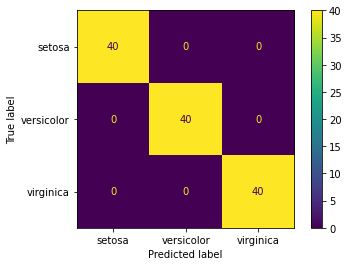

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      1.00      1.00        40
   virginica       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


Métricas de avaliação de teste:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


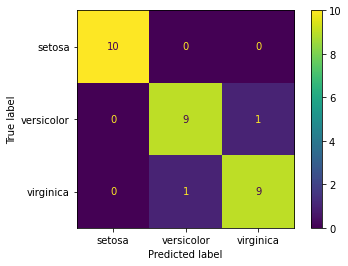

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

metricas_classificacao(tree, X_train, X_test, y_train, y_test)

In [ ]:
tree.get_depth()

5

In [ ]:
y_train.unique()

array(['setosa', 'virginica', 'versicolor'], dtype=object)

In [ ]:
tree.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
X_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
tree.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

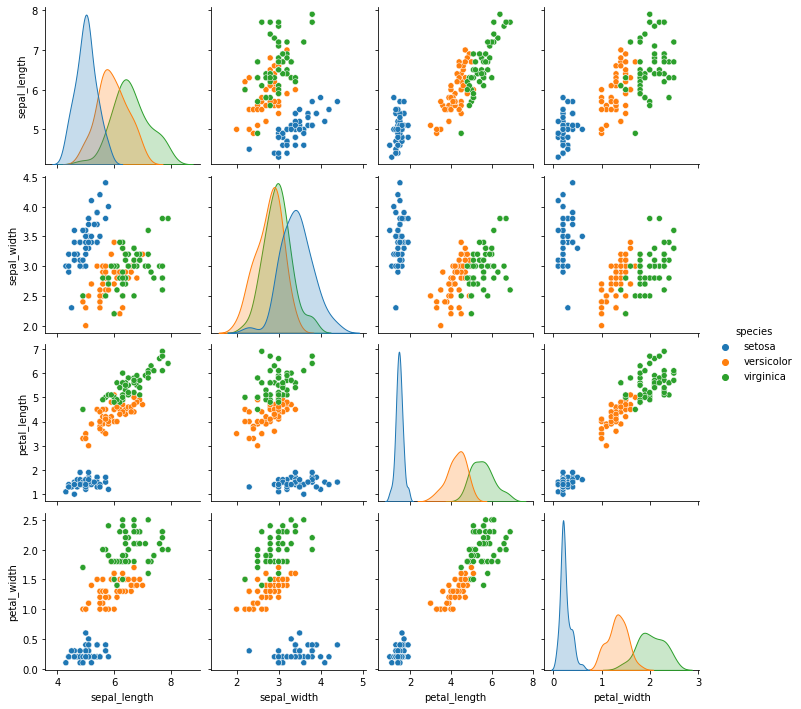

In [ ]:
sns.pairplot(df, hue="species")

In [ ]:
tree.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

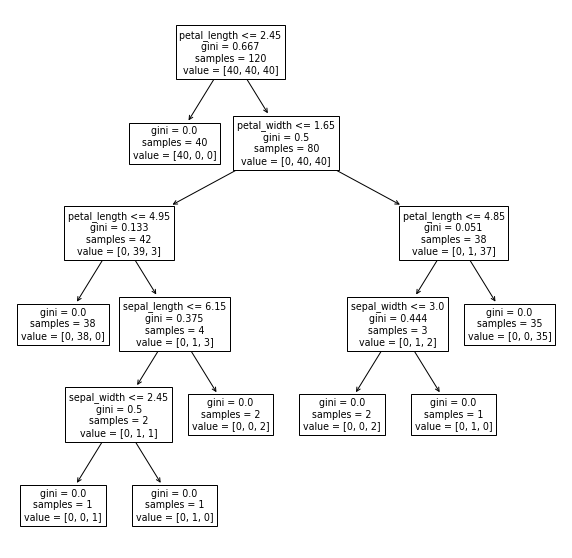

In [ ]:
plt.subplots(1, 1, figsize=(10, 10))

plot_tree(tree, feature_names=tree.feature_names_in_)
plt.show()

In [ ]:
tree.decision_path(X_test)

<30x15 sparse matrix of type '<class 'numpy.int64'>'
	with 103 stored elements in Compressed Sparse Row format>

In [ ]:
dec_path = tree.decision_path(X_test).toarray()

In [ ]:
X_test.iloc[[0]]

sepal_length  sepal_width  petal_length  petal_width
38           4.4          3.0           1.3          0.2

In [ ]:
dec_path[0]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
y_test.iloc[[0]]

38    setosa
Name: species, dtype: object

In [ ]:
X_test.iloc[[21]]

sepal_length  sepal_width  petal_length  petal_width
140           6.7          3.1           5.6          2.4

In [ ]:
dec_path[21]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [ ]:
y_test.iloc[[21]]

140    virginica
Name: species, dtype: object

In [ ]:
tree.predict(X_test)[21]

'virginica'

Para saber mais, como se aproveitar dessas estruturas, [clique aqui!](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)

Adaptando o código da página acima, podemos construir uma função para interpretar a árvore:

In [ ]:
tree.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [ ]:
tree.tree_.feature

array([ 2, -2,  3,  2, -2,  0,  1, -2, -2, -2,  2,  1, -2, -2, -2],
      dtype=int64)

In [ ]:
tree.tree_.threshold

array([ 2.44999999, -2.        ,  1.65000004,  4.95000005, -2.        ,
        6.1500001 ,  2.45000005, -2.        , -2.        , -2.        ,
        4.85000014,  3.        , -2.        , -2.        , -2.        ])

In [ ]:
def interpreta_arvore(tree, X_test, idx):
    
    node_indicator = tree.decision_path(X_test)
    leaf_id = tree.apply(X_test)
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold

    node_index = node_indicator.indices[node_indicator.indptr[idx] : node_indicator.indptr[idx + 1]]
    
    print(f"{idx+1}a observação de teste:")
    display(X_test.iloc[[idx]])

    print("="*50)
    print("Regras utilizada em cada nó percorrido da árvore:\n")

    feature_names = tree.feature_names_in_
    
    for node_id in node_index:

        # continue to the next node if it is a leaf node
        if leaf_id[idx] == node_id:
            continue

        # check if value of the split feature for sample 0 is below threshold
        if X_test.iloc[idx][feature[node_id]] <= threshold[node_id]:
            threshold_sign = "<="
        else:
            threshold_sign = ">"
        
        print("Nó de decisão {node} : ({feature_name} = {value}) "
              "{inequality} {threshold:.2f})".format(node=node_id,
                                                     feature_name=feature_names[feature[node_id]],
                                                     value=X_test.iloc[idx][feature[node_id]],
                                                     inequality=threshold_sign,
                                                     threshold=threshold[node_id]))
        
    y_pred = tree.predict(X_test)[idx]
    print("="*50)
    print(f"Predição na folha: y = {y_pred}")

In [ ]:
for i in range(X_test.shape[0]):

    interpreta_arvore(tree, X_test, i)
    
    print()
    print("#"*80)
    print()

1a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
38           4.4          3.0           1.3          0.2

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 1.3) <= 2.45)
Predição na folha: y = setosa

################################################################################

2a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
127           6.1          3.0           4.9          1.8

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 4.9) > 2.45)
Nó de decisão 2 : (petal_width = 1.8) > 1.65)
Nó de decisão 10 : (petal_length = 4.9) > 4.85)
Predição na folha: y = virginica

################################################################################

3a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
57           4.9          2.4           3.3          1.0

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 3.3) > 2.45)
Nó de decisão 2 : (petal_width = 1.0) <= 1.65)
Nó de decisão 3 : (petal_length = 3.3) <= 4.95)
Predição na folha: y = versicolor

################################################################################

4a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
93           5.0          2.3           3.3          1.0

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 3.3) > 2.45)
Nó de decisão 2 : (petal_width = 1.0) <= 1.65)
Nó de decisão 3 : (petal_length = 3.3) <= 4.95)
Predição na folha: y = versicolor

################################################################################

5a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
42           4.4          3.2           1.3          0.2

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 1.3) <= 2.45)
Predição na folha: y = setosa

################################################################################

6a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
56           6.3          3.3           4.7          1.6

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 4.7) > 2.45)
Nó de decisão 2 : (petal_width = 1.6) <= 1.65)
Nó de decisão 3 : (petal_length = 4.7) <= 4.95)
Predição na folha: y = versicolor

################################################################################

7a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
22           4.6          3.6           1.0          0.2

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 1.0) <= 2.45)
Predição na folha: y = setosa

################################################################################

8a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
20           5.4          3.4           1.7          0.2

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 1.7) <= 2.45)
Predição na folha: y = setosa

################################################################################

9a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
147           6.5          3.0           5.2          2.0

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 5.2) > 2.45)
Nó de decisão 2 : (petal_width = 2.0) > 1.65)
Nó de decisão 10 : (petal_length = 5.2) > 4.85)
Predição na folha: y = virginica

################################################################################

10a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
84           5.4          3.0           4.5          1.5

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 4.5) > 2.45)
Nó de decisão 2 : (petal_width = 1.5) <= 1.65)
Nó de decisão 3 : (petal_length = 4.5) <= 4.95)
Predição na folha: y = versicolor

################################################################################

11a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
107           7.3          2.9           6.3          1.8

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 6.3) > 2.45)
Nó de decisão 2 : (petal_width = 1.8) > 1.65)
Nó de decisão 10 : (petal_length = 6.3) > 4.85)
Predição na folha: y = virginica

################################################################################

12a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
141           6.9          3.1           5.1          2.3

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 5.1) > 2.45)
Nó de decisão 2 : (petal_width = 2.3) > 1.65)
Nó de decisão 10 : (petal_length = 5.1) > 4.85)
Predição na folha: y = virginica

################################################################################

13a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
104           6.5          3.0           5.8          2.2

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 5.8) > 2.45)
Nó de decisão 2 : (petal_width = 2.2) > 1.65)
Nó de decisão 10 : (petal_length = 5.8) > 4.85)
Predição na folha: y = virginica

################################################################################

14a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
51           6.4          3.2           4.5          1.5

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 4.5) > 2.45)
Nó de decisão 2 : (petal_width = 1.5) <= 1.65)
Nó de decisão 3 : (petal_length = 4.5) <= 4.95)
Predição na folha: y = versicolor

################################################################################

15a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
7           5.0          3.4           1.5          0.2

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 1.5) <= 2.45)
Predição na folha: y = setosa

################################################################################

16a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
49           5.0          3.3           1.4          0.2

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 1.4) <= 2.45)
Predição na folha: y = setosa

################################################################################

17a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
14           5.8          4.0           1.2          0.2

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 1.2) <= 2.45)
Predição na folha: y = setosa

################################################################################

18a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
69           5.6          2.5           3.9          1.1

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 3.9) > 2.45)
Nó de decisão 2 : (petal_width = 1.1) <= 1.65)
Nó de decisão 3 : (petal_length = 3.9) <= 4.95)
Predição na folha: y = versicolor

################################################################################

19a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
63           6.1          2.9           4.7          1.4

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 4.7) > 2.45)
Nó de decisão 2 : (petal_width = 1.4) <= 1.65)
Nó de decisão 3 : (petal_length = 4.7) <= 4.95)
Predição na folha: y = versicolor

################################################################################

20a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
138           6.0          3.0           4.8          1.8

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 4.8) > 2.45)
Nó de decisão 2 : (petal_width = 1.8) > 1.65)
Nó de decisão 10 : (petal_length = 4.8) <= 4.85)
Nó de decisão 11 : (sepal_width = 3.0) <= 3.00)
Predição na folha: y = virginica

################################################################################

21a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
10           5.4          3.7           1.5          0.2

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 1.5) <= 2.45)
Predição na folha: y = setosa

################################################################################

22a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
140           6.7          3.1           5.6          2.4

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 5.6) > 2.45)
Nó de decisão 2 : (petal_width = 2.4) > 1.65)
Nó de decisão 10 : (petal_length = 5.6) > 4.85)
Predição na folha: y = virginica

################################################################################

23a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
58           6.6          2.9           4.6          1.3

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 4.6) > 2.45)
Nó de decisão 2 : (petal_width = 1.3) <= 1.65)
Nó de decisão 3 : (petal_length = 4.6) <= 4.95)
Predição na folha: y = versicolor

################################################################################

24a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
134           6.1          2.6           5.6          1.4

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 5.6) > 2.45)
Nó de decisão 2 : (petal_width = 1.4) <= 1.65)
Nó de decisão 3 : (petal_length = 5.6) > 4.95)
Nó de decisão 5 : (sepal_length = 6.1) <= 6.15)
Nó de decisão 6 : (sepal_width = 2.6) > 2.45)
Predição na folha: y = versicolor

################################################################################

25a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
132           6.4          2.8           5.6          2.2

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 5.6) > 2.45)
Nó de decisão 2 : (petal_width = 2.2) > 1.65)
Nó de decisão 10 : (petal_length = 5.6) > 4.85)
Predição na folha: y = virginica

################################################################################

26a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
77           6.7          3.0           5.0          1.7

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 5.0) > 2.45)
Nó de decisão 2 : (petal_width = 1.7) > 1.65)
Nó de decisão 10 : (petal_length = 5.0) > 4.85)
Predição na folha: y = virginica

################################################################################

27a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
75           6.6          3.0           4.4          1.4

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 4.4) > 2.45)
Nó de decisão 2 : (petal_width = 1.4) <= 1.65)
Nó de decisão 3 : (petal_length = 4.4) <= 4.95)
Predição na folha: y = versicolor

################################################################################

28a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
18           5.7          3.8           1.7          0.3

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 1.7) <= 2.45)
Predição na folha: y = setosa

################################################################################

29a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
116           6.5          3.0           5.5          1.8

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 5.5) > 2.45)
Nó de decisão 2 : (petal_width = 1.8) > 1.65)
Nó de decisão 10 : (petal_length = 5.5) > 4.85)
Predição na folha: y = virginica

################################################################################

30a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
28           5.2          3.4           1.4          0.2

Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (petal_length = 1.4) <= 2.45)
Predição na folha: y = setosa

################################################################################



____________

### KNN

Modelos KNN também são interpretáveis, em certa medida, pois podemos **olhar para os vizinhos que foram levados em conta pra tomar a decisão**, e com isso, podemos comparar estes vizinhos com a observação de teste, e, assim, interpretar a decisão!

Fazemos isso com o método [kneighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors). Vamos ver um exemplo:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


Métricas de avaliação de treino:
[[40  0  0]
 [ 0 38  2]
 [ 0  2 38]]


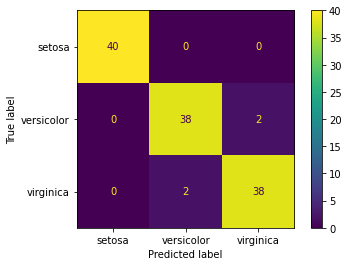

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.95      0.95        40
   virginica       0.95      0.95      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120


Métricas de avaliação de teste:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


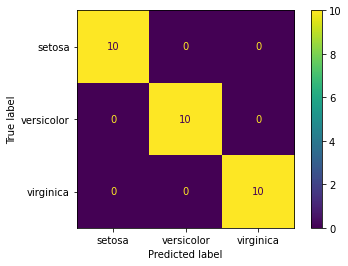

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)

metricas_classificacao(knn, X_train, X_test, y_train, y_test)

Vamos olhar para os vizinhos que foram utilizados na classificação:

In [ ]:
dist_k, idcs_k = knn.kneighbors(X_test)

Vamos olhar, por exemplo, apenas para a primeira observação:

In [ ]:
X_test.iloc[[0]]

sepal_length  sepal_width  petal_length  petal_width
38           4.4          3.0           1.3          0.2

In [ ]:
dist_k[0]

array([0.14142136, 0.24494897, 0.3       , 0.3       , 0.36055513])

In [ ]:
idcs_k[0]

array([  0,  93, 119,  58, 116], dtype=int64)

Podemos usar os índices para inspecionar quais foram as observações utilizadas na classificação:

In [ ]:
knn.n_neighbors

5

In [ ]:
# cuidado: temos que usar o iloc, pq os idcs_k são as POSIÇÕES ordinais das observações,
# não os indices do pandas!!

X_train.iloc[idcs_k[0]]

sepal_length  sepal_width  petal_length  petal_width
8            4.4          2.9           1.4          0.2
13           4.3          3.0           1.1          0.1
3            4.6          3.1           1.5          0.2
47           4.6          3.2           1.4          0.2
2            4.7          3.2           1.3          0.2

In [ ]:
X_train.iloc[idcs_k[0]].describe()

sepal_length  sepal_width  petal_length  petal_width
count      5.000000     5.000000      5.000000     5.000000
mean       4.520000     3.080000      1.340000     0.180000
std        0.164317     0.130384      0.151658     0.044721
min        4.300000     2.900000      1.100000     0.100000
25%        4.400000     3.000000      1.300000     0.200000
50%        4.600000     3.100000      1.400000     0.200000
75%        4.600000     3.200000      1.400000     0.200000
max        4.700000     3.200000      1.500000     0.200000

In [ ]:
y_train.iloc[idcs_k[0]]

8     setosa
13    setosa
3     setosa
47    setosa
2     setosa
Name: species, dtype: object

Faz sentido, pois:

In [ ]:
knn.predict(X_test)[0]

'setosa'

In [ ]:
knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
knn.predict_proba(X_test)[0]

array([1., 0., 0.])

Vamos criar uma função:

In [ ]:
def interpreta_knn(knn, X_train, y_train, X_test, idx):
    
    print(f"{idx+1}a observação de teste:")
    display(X_test.iloc[[idx]])
    
    dist_k, indices_k = knn.kneighbors(X_test)

    print("="*50)
    print(f"Número de vizinhos utilizados na classificação: {knn.n_neighbors}\n")
    
    print(f"Distância entre observação de teste e cada vizinho:\n{np.round(dist_k[idx], 3)}\n")
    
    print(f"Vizinhos utilizados, e respectivo target:")
    display(pd.concat([X_train.iloc[indices_k[idx]], y_train.iloc[indices_k[idx]]], axis=1))
    
    print("="*50)
    print("Probas de cada classe:")
    display(pd.DataFrame({"probas":knn.predict_proba(X_test)[idx]}, index=knn.classes_).T)
    
    print(f"Classe final predita: {knn.predict(X_test)[idx]}")

In [ ]:
y_pred_test = knn.predict(X_test)
y_proba_test = knn.predict_proba(X_test)

In [ ]:
def interpreta_knn2(knn, X_train, y_train, 
                    X_test, y_pred_test, y_proba_test,
                    idx):
    
    print(f"{idx+1}a observação de teste:")
    display(X_test.iloc[[idx]])
    
    dist_k, indices_k = knn.kneighbors(X_test)

    print("="*50)
    print(f"Número de vizinhos utilizados na classificação: {knn.n_neighbors}\n")
    
    print(f"Distância entre observação de teste e cada vizinho:\n{np.round(dist_k[idx], 3)}\n")
    
    print(f"Vizinhos utilizados, e respectivo target:")
    display(pd.concat([X_train.iloc[indices_k[idx]], y_train.iloc[indices_k[idx]]], axis=1))
    
    print("="*50)
    print("Probas de cada classe:")
    display(pd.DataFrame({"probas":y_proba_test[idx]}, index=knn.classes_).T)
    
    print(f"Classe final predita: {y_pred_test[idx]}")

In [ ]:
for i in range(X_test.shape[0]):

    interpreta_knn2(knn, X_train, y_train, 
                    X_test, y_pred_test, y_proba_test,
                    idx=i)
    
    print()
    print("#"*80)
    print()

1a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
38           4.4          3.0           1.3          0.2

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.141 0.245 0.3   0.3   0.361]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width species
8            4.4          2.9           1.4          0.2  setosa
13           4.3          3.0           1.1          0.1  setosa
3            4.6          3.1           1.5          0.2  setosa
47           4.6          3.2           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa

Probas de cada classe:


setosa  versicolor  virginica
probas     1.0         0.0        0.0

Classe final predita: setosa

################################################################################

2a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
127           6.1          3.0           4.9          1.8

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.245 0.283 0.3   0.361 0.424]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
126           6.2          2.8           4.8          1.8   virginica
149           5.9          3.0           5.1          1.8   virginica
70            5.9          3.2           4.8          1.8  versicolor
123           6.3          2.7           4.9          1.8   virginica
83            6.0          2.7           5.1          1.6  versicolor

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         0.4        0.6

Classe final predita: virginica

################################################################################

3a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
57           4.9          2.4           3.3          1.0

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.387 0.458 0.721 0.787 0.837]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
98           5.1          2.5           3.0          1.1  versicolor
60           5.0          2.0           3.5          1.0  versicolor
81           5.5          2.4           3.7          1.0  versicolor
80           5.5          2.4           3.8          1.1  versicolor
59           5.2          2.7           3.9          1.4  versicolor

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         1.0        0.0

Classe final predita: versicolor

################################################################################

4a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
93           5.0          2.3           3.3          1.0

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.361 0.387 0.648 0.721 0.787]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
60           5.0          2.0           3.5          1.0  versicolor
98           5.1          2.5           3.0          1.1  versicolor
81           5.5          2.4           3.7          1.0  versicolor
80           5.5          2.4           3.8          1.1  versicolor
79           5.7          2.6           3.5          1.0  versicolor

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         1.0        0.0

Classe final predita: versicolor

################################################################################

5a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
42           4.4          3.2           1.3          0.2

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.224 0.3   0.3   0.316 0.316]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width species
47           4.6          3.2           1.4          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
6            4.6          3.4           1.4          0.3  setosa
8            4.4          2.9           1.4          0.2  setosa

Probas de cada classe:


setosa  versicolor  virginica
probas     1.0         0.0        0.0

Classe final predita: setosa

################################################################################

6a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
56           6.3          3.3           4.7          1.6

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.374 0.424 0.458 0.469 0.548]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
85           6.0          3.4           4.5          1.6  versicolor
91           6.1          3.0           4.6          1.4  versicolor
86           6.7          3.1           4.7          1.5  versicolor
70           5.9          3.2           4.8          1.8  versicolor
78           6.0          2.9           4.5          1.5  versicolor

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         1.0        0.0

Classe final predita: versicolor

################################################################################

7a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
22           4.6          3.6           1.0          0.2

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.458 0.51  0.51  0.52  0.566]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width species
6            4.6          3.4           1.4          0.3  setosa
2            4.7          3.2           1.3          0.2  setosa
37           4.9          3.6           1.4          0.1  setosa
40           5.0          3.5           1.3          0.3  setosa
47           4.6          3.2           1.4          0.2  setosa

Probas de cada classe:


setosa  versicolor  virginica
probas     1.0         0.0        0.0

Classe final predita: setosa

################################################################################

8a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
20           5.4          3.4           1.7          0.2

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.283 0.3   0.361 0.374 0.424]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width species
31           5.4          3.4           1.5          0.4  setosa
27           5.2          3.5           1.5          0.2  setosa
39           5.1          3.4           1.5          0.2  setosa
48           5.3          3.7           1.5          0.2  setosa
36           5.5          3.5           1.3          0.2  setosa

Probas de cada classe:


setosa  versicolor  virginica
probas     1.0         0.0        0.0

Classe final predita: setosa

################################################################################

9a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
147           6.5          3.0           5.2          2.0

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.224 0.346 0.361 0.387 0.387]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width    species
110           6.5          3.2           5.1          2.0  virginica
111           6.4          2.7           5.3          1.9  virginica
145           6.7          3.0           5.2          2.3  virginica
137           6.4          3.1           5.5          1.8  virginica
115           6.4          3.2           5.3          2.3  virginica

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         0.0        1.0

Classe final predita: virginica

################################################################################

10a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
84           5.4          3.0           4.5          1.5

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.2   0.412 0.48  0.49  0.51 ]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
66           5.6          3.0           4.5          1.5  versicolor
55           5.7          2.8           4.5          1.3  versicolor
96           5.7          2.9           4.2          1.3  versicolor
88           5.6          3.0           4.1          1.3  versicolor
94           5.6          2.7           4.2          1.3  versicolor

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         1.0        0.0

Classe final predita: versicolor

################################################################################

11a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
107           7.3          2.9           6.3          1.8

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.265 0.436 0.529 0.548 0.557]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width    species
130           7.4          2.8           6.1          1.9  virginica
125           7.2          3.2           6.0          1.8  virginica
105           7.6          3.0           6.6          2.1  virginica
102           7.1          3.0           5.9          2.1  virginica
129           7.2          3.0           5.8          1.6  virginica

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         0.0        1.0

Classe final predita: virginica

################################################################################

12a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
141           6.9          3.1           5.1          2.3

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.245 0.361 0.469 0.51  0.548]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
139           6.9          3.1           5.4          2.1  virginica
112           6.8          3.0           5.5          2.1  virginica
110           6.5          3.2           5.1          2.0  virginica
115           6.4          3.2           5.3          2.3  virginica

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         0.0        1.0

Classe final predita: virginica

################################################################################

13a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
104           6.5          3.0           5.8          2.2

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.316 0.387 0.387 0.436 0.469]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width    species
128           6.4          2.8           5.6          2.1  virginica
124           6.7          3.3           5.7          2.1  virginica
143           6.8          3.2           5.9          2.3  virginica
112           6.8          3.0           5.5          2.1  virginica
120           6.9          3.2           5.7          2.3  virginica

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         0.0        1.0

Classe final predita: virginica

################################################################################

14a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
51           6.4          3.2           4.5          1.5

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.346 0.374 0.387 0.412 0.424]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
65           6.7          3.1           4.4          1.4  versicolor
86           6.7          3.1           4.7          1.5  versicolor
91           6.1          3.0           4.6          1.4  versicolor
74           6.4          2.9           4.3          1.3  versicolor
54           6.5          2.8           4.6          1.5  versicolor

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         1.0        0.0

Classe final predita: versicolor

################################################################################

15a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
7           5.0          3.4           1.5          0.2

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.1   0.173 0.2   0.224 0.224]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width species
39           5.1          3.4           1.5          0.2  setosa
0            5.1          3.5           1.4          0.2  setosa
17           5.1          3.5           1.4          0.3  setosa
26           5.0          3.4           1.6          0.4  setosa
4            5.0          3.6           1.4          0.2  setosa

Probas de cada classe:


setosa  versicolor  virginica
probas     1.0         0.0        0.0

Classe final predita: setosa

################################################################################

16a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
49           5.0          3.3           1.4          0.2

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.173 0.224 0.224 0.245 0.245]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width species
39           5.1          3.4           1.5          0.2  setosa
35           5.0          3.2           1.2          0.2  setosa
0            5.1          3.5           1.4          0.2  setosa
34           4.9          3.1           1.5          0.2  setosa
17           5.1          3.5           1.4          0.3  setosa

Probas de cada classe:


setosa  versicolor  virginica
probas     1.0         0.0        0.0

Classe final predita: setosa

################################################################################

17a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
14           5.8          4.0           1.2          0.2

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.412 0.469 0.548 0.592 0.656]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width species
33           5.5          4.2           1.4          0.2  setosa
16           5.4          3.9           1.3          0.4  setosa
15           5.7          4.4           1.5          0.4  setosa
36           5.5          3.5           1.3          0.2  setosa
48           5.3          3.7           1.5          0.2  setosa

Probas de cada classe:


setosa  versicolor  virginica
probas     1.0         0.0        0.0

Classe final predita: setosa

################################################################################

18a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
69           5.6          2.5           3.9          1.1

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.173 0.245 0.265 0.265 0.3  ]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
80           5.5          2.4           3.8          1.1  versicolor
89           5.5          2.5           4.0          1.3  versicolor
81           5.5          2.4           3.7          1.0  versicolor
92           5.8          2.6           4.0          1.2  versicolor
82           5.8          2.7           3.9          1.2  versicolor

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         1.0        0.0

Classe final predita: versicolor

################################################################################

19a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
63           6.1          2.9           4.7          1.4

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.141 0.224 0.245 0.424 0.436]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
91            6.1          3.0           4.6          1.4  versicolor
73            6.1          2.8           4.7          1.2  versicolor
78            6.0          2.9           4.5          1.5  versicolor
97            6.2          2.9           4.3          1.3  versicolor
126           6.2          2.8           4.8          1.8   virginica

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         0.8        0.2

Classe final predita: versicolor

################################################################################

20a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
138           6.0          3.0           4.8          1.8

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.224 0.283 0.316 0.436 0.436]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
70            5.9          3.2           4.8          1.8  versicolor
126           6.2          2.8           4.8          1.8   virginica
149           5.9          3.0           5.1          1.8   virginica
123           6.3          2.7           4.9          1.8   virginica
78            6.0          2.9           4.5          1.5  versicolor

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         0.4        0.6

Classe final predita: virginica

################################################################################

21a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
10           5.4          3.7           1.5          0.2

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.1   0.283 0.3   0.332 0.332]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width species
48           5.3          3.7           1.5          0.2  setosa
27           5.2          3.5           1.5          0.2  setosa
36           5.5          3.5           1.3          0.2  setosa
19           5.1          3.8           1.5          0.3  setosa
46           5.1          3.8           1.6          0.2  setosa

Probas de cada classe:


setosa  versicolor  virginica
probas     1.0         0.0        0.0

Classe final predita: setosa

################################################################################

22a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
140           6.7          3.1           5.6          2.4

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.245 0.265 0.346 0.346 0.374]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width    species
144           6.7          3.3           5.7          2.5  virginica
120           6.9          3.2           5.7          2.3  virginica
112           6.8          3.0           5.5          2.1  virginica
143           6.8          3.2           5.9          2.3  virginica
124           6.7          3.3           5.7          2.1  virginica

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         0.0        1.0

Classe final predita: virginica

################################################################################

23a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
58           6.6          2.9           4.6          1.3

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.245 0.316 0.316 0.316 0.361]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
54           6.5          2.8           4.6          1.5  versicolor
65           6.7          3.1           4.4          1.4  versicolor
76           6.8          2.8           4.8          1.4  versicolor
86           6.7          3.1           4.7          1.5  versicolor
74           6.4          2.9           4.3          1.3  versicolor

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         1.0        0.0

Classe final predita: versicolor

################################################################################

24a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
134           6.1          2.6           5.6          1.4

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.539 0.557 0.583 0.663 0.714]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
103           6.3          2.9           5.6          1.8   virginica
83            6.0          2.7           5.1          1.6  versicolor
133           6.3          2.8           5.1          1.5   virginica
111           6.4          2.7           5.3          1.9   virginica
137           6.4          3.1           5.5          1.8   virginica

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         0.2        0.8

Classe final predita: virginica

################################################################################

25a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
132           6.4          2.8           5.6          2.2

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.1   0.424 0.436 0.469 0.51 ]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width    species
128           6.4          2.8           5.6          2.1  virginica
103           6.3          2.9           5.6          1.8  virginica
111           6.4          2.7           5.3          1.9  virginica
112           6.8          3.0           5.5          2.1  virginica
115           6.4          3.2           5.3          2.3  virginica

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         0.0        1.0

Classe final predita: virginica

################################################################################

26a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
77           6.7          3.0           5.0          1.7

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.316 0.374 0.424 0.424 0.5  ]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
52            6.9          3.1           4.9          1.5  versicolor
86            6.7          3.1           4.7          1.5  versicolor
76            6.8          2.8           4.8          1.4  versicolor
110           6.5          3.2           5.1          2.0   virginica
133           6.3          2.8           5.1          1.5   virginica

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         0.6        0.4

Classe final predita: versicolor

################################################################################

27a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
75           6.6          3.0           4.4          1.4

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.141 0.265 0.316 0.346 0.436]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width     species
65           6.7          3.1           4.4          1.4  versicolor
74           6.4          2.9           4.3          1.3  versicolor
54           6.5          2.8           4.6          1.5  versicolor
86           6.7          3.1           4.7          1.5  versicolor
97           6.2          2.9           4.3          1.3  versicolor

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         1.0        0.0

Classe final predita: versicolor

################################################################################

28a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
18           5.7          3.8           1.7          0.3

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.332 0.469 0.52  0.548 0.548]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width species
5            5.4          3.9           1.7          0.4  setosa
48           5.3          3.7           1.5          0.2  setosa
16           5.4          3.9           1.3          0.4  setosa
31           5.4          3.4           1.5          0.4  setosa
36           5.5          3.5           1.3          0.2  setosa

Probas de cada classe:


setosa  versicolor  virginica
probas     1.0         0.0        0.0

Classe final predita: setosa

################################################################################

29a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
116           6.5          3.0           5.5          1.8

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.141 0.245 0.387 0.387 0.424]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width    species
137           6.4          3.1           5.5          1.8  virginica
103           6.3          2.9           5.6          1.8  virginica
111           6.4          2.7           5.3          1.9  virginica
128           6.4          2.8           5.6          2.1  virginica
112           6.8          3.0           5.5          2.1  virginica

Probas de cada classe:


setosa  versicolor  virginica
probas     0.0         0.0        1.0

Classe final predita: virginica

################################################################################

30a observação de teste:


sepal_length  sepal_width  petal_length  petal_width
28           5.2          3.4           1.4          0.2

Número de vizinhos utilizados na classificação: 5

Distância entre observação de teste e cada vizinho:
[0.141 0.141 0.141 0.173 0.265]

Vizinhos utilizados, e respectivo target:


sepal_length  sepal_width  petal_length  petal_width species
27           5.2          3.5           1.5          0.2  setosa
39           5.1          3.4           1.5          0.2  setosa
0            5.1          3.5           1.4          0.2  setosa
17           5.1          3.5           1.4          0.3  setosa
40           5.0          3.5           1.3          0.3  setosa

Probas de cada classe:


setosa  versicolor  virginica
probas     1.0         0.0        0.0

Classe final predita: setosa

################################################################################



_____

O que fazemos no caso em que não é praticável utilizarmos alguns dos modelos mais simples e interpretáveis acima?

Nestes casos, o que vamos querer fazer é **treinar um modelo simples $g$** que seja capaz de **explicar um modelo complexo $f$**. Diremos então que $g$ é o **modelo explicativo** de $f$!

Veremos como fazer isso agora!

____
____
____

## 3) LIME

O LIME (**L**ocal **I**nterpretable **M**odel-agnostic **E**xplanations) é uma técnica que nos permite gerar modelos explicativos $g$ que são treinados **localmente** com o objetivo de explicar um modelo complexo $f$!

Considere o classificador à esquerda, que é o modelo original ($f$). Note a fronteira de decisão não-linear, que é um indicativo de dificuldade de explicabilidade. Caso queiramos explicar este modelo globalmente, teremos dificuldades, justo? (De fato, fronteiras de decisão não-lineares são dificilmente explicáveis!)

Por outro lado, **localmente**, em regiões próximas à fronteira de decisão, é possível **aproximarmos $f$ pelo modelo simples $g$, que é linear**. 

Com isso, **localmente**, fica fácil de explicar a decisão, com o modelo representado à direita!

<img src=https://deepandshallowml.files.wordpress.com/2019/11/lime_intuition_final.png width=600>

Os modelos lineares locais treinados pelo LIME também são conhecidos como surrogate models, e seu treinamento funciona da seguinte maneira:

- Um novo dataset de observações artificiais é criado (dados permutados), com base na distribuição das features na redondeza da observação a ser explicada;

- A distância entre estas observações e as observações reais são calculadas;

- O modelo é utilizado para predizer o `predict_proba` para estas novas observações;

- Escolhe-se as `m` features mais importantes, de acordo com os dados permutados;

- Um modelo linear é treinado com as `m` features, ponderando a similaridade entre samples e a observação a ser explicada.

O artigo original do LIME está disponível [aqui](https://arxiv.org/pdf/1602.04938.pdf) -- e ele é (talvez surpreendentemente) simples de ler!

E [neste post](https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5) há mais detalhes sobre o LIME e seu funcionamento!

Aqui, vamos ver, na prática, como aplicar o LIME!

Pra isso, existe a biblioteca [LIME](https://github.com/marcotcr/lime). Para instala-la:

`!pip install lime`

Vamos vê-la em ação!

Vamos construir um modelo bem mais complexo, para que faça sentido aplicarmos técnicas de explicabilidade!

In [ ]:
df = pd.read_csv("../datasets/breast_cancer.csv")

X = df.drop(columns=["id", "diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Métricas de avaliação de treino:
[[285   0]
 [  0 170]]


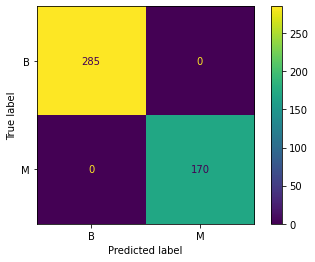

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       285
           M       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


Métricas de avaliação de teste:
[[72  0]
 [ 4 38]]


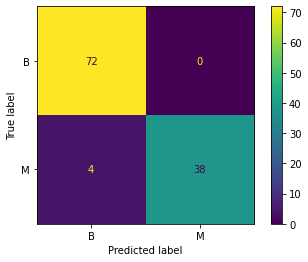

              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier().fit(X_train, y_train)

metricas_classificacao(gb, X_train, X_test, y_train, y_test)

In [ ]:
from lime import lime_tabular

In [ ]:
X_train.values

array([[1.602e+01, 2.324e+01, 1.027e+02, ..., 9.975e-02, 2.948e-01,
        8.452e-02],
       [1.232e+01, 1.239e+01, 7.885e+01, ..., 9.391e-02, 2.827e-01,
        6.771e-02],
       [1.285e+01, 2.137e+01, 8.263e+01, ..., 5.601e-02, 2.488e-01,
        8.151e-02],
       ...,
       [1.300e+01, 2.513e+01, 8.261e+01, ..., 5.921e-02, 2.306e-01,
        6.291e-02],
       [1.420e+01, 2.053e+01, 9.241e+01, ..., 1.339e-01, 2.534e-01,
        7.858e-02],
       [1.706e+01, 2.100e+01, 1.118e+02, ..., 1.827e-01, 2.623e-01,
        7.599e-02]])

In [ ]:
gb.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [ ]:
gb.classes_

array(['B', 'M'], dtype=object)

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              mode="classification",
                                              feature_names=gb.feature_names_in_,
                                              class_names=gb.classes_)

In [ ]:
X_test.iloc[[0]]

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
120        11.41         10.82           73.34      403.3          0.09373   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
120           0.06685         0.03512              0.02623         0.1667   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
120                 0.06113  ...         12.82          15.97   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
120            83.74       510.5            0.1548              0.239   

     concavity_worst  concave points_worst  symmetry_worst  \
120           0.2102               0.08958          0.3016   

     fractal_dimension_worst  
120                  0.08523  

[1 rows x 30 columns]

In [ ]:
X_test.iloc[0]

radius_mean                 11.410000
texture_mean                10.820000
perimeter_mean              73.340000
area_mean                  403.300000
smoothness_mean              0.093730
compactness_mean             0.066850
concavity_mean               0.035120
concave points_mean          0.026230
symmetry_mean                0.166700
fractal_dimension_mean       0.061130
radius_se                    0.140800
texture_se                   0.460700
perimeter_se                 1.103000
area_se                     10.500000
smoothness_se                0.006040
compactness_se               0.015290
concavity_se                 0.015140
concave points_se            0.006460
symmetry_se                  0.013440
fractal_dimension_se         0.002206
radius_worst                12.820000
texture_worst               15.970000
perimeter_worst             83.740000
area_worst                 510.500000
smoothness_worst             0.154800
compactness_worst            0.239000
concavity_wo

In [ ]:
explainer.explain_instance(X_test.iloc[0],
                           gb.predict_proba,
                           num_features=gb.n_features_in_)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
vars(explanation)

{'random_state': None,
 'mode': 'classification',
 'domain_mapper': <lime.lime_tabular.TableDomainMapper at 0x1f8d9302dc0>,
 'local_exp': {1: [(13, -0.16101353447779426),
   (23, -0.15567422543499138),
   (21, -0.14785870340124205),
   (26, -0.12003914224451105),
   (27, -0.11925405370200995),
   (1, -0.09643910960708701),
   (22, -0.0822632435884227),
   (7, -0.08078957220408994),
   (20, -0.07706359772909203),
   (24, 0.05497894717740247),
   (3, -0.035498570968050515),
   (5, -0.03222653375191669),
   (10, -0.027482177861798948),
   (12, -0.00950267174009323),
   (9, -0.009424955939820836),
   (11, -0.009336804097808725),
   (19, -0.00875734663906647),
   (0, -0.007735735785046657),
   (2, 0.0064912019780567504),
   (8, -0.0064432723583759954),
   (6, 0.005008895828075762),
   (16, 0.004726317560249849),
   (15, 0.004324844116239704),
   (25, -0.004040083429651331),
   (17, -0.0037456090752666336),
   (14, 0.0030716468077787514),
   (4, -0.003041900407130699),
   (29, -0.00263162084

Juntando tudo:

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              mode="classification",
                                              feature_names=gb.feature_names_in_,
                                              class_names=gb.classes_)

In [ ]:
explanation = explainer.explain_instance(X_test.iloc[0],
                                         gb.predict_proba,
                                         num_features=gb.n_features_in_)

explanation.show_in_notebook()

C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Acima, visualizamos o resultado do explainer!

O plot no centro é a principal informação para a interpretabilidade: ele exibe o valor dos coeficientes do modelo linear treinado localmente.

Importante: para o treinamento do modelo linear, as features numéricas são discretizadas em bins, cujos intervalos são indicados no plot.

As features são exibidas em ordem de importância, e é assim que somos capazes de descrever quais foram as features mais importantes na tomada de decisão, observação a observação!

Mudando a observação a ser explicada: a interpretação muda!

In [ ]:
explanation = explainer.explain_instance(X_test.iloc[1],
                                         gb.predict_proba,
                                         num_features=gb.n_features_in_)

explanation.show_in_notebook()

C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


____
____
____

## 4) SHAP

Por fim, vamos dar uma olhada no SHAP (**SH**apley **A**dditive ex**P**lanation), um outro método muito utilizado para interpretabilidade.

o SHAP é um método baseado em um conceito de [teoria dos jogos](https://pt.wikipedia.org/wiki/Teoria_dos_jogos) conhecido como [Shapley values](https://christophm.github.io/interpretable-ml-book/shapley.html).

A ideia geral do método é encontrar **a importância das features para a predição** de modo bem explícito: para encontrar a importância de uma feature $x_i$, temos que:

- Treinar o modelo $f$ com todos os **subconjuntos possíveis** de features, **incluindo $x_i$**;
- Depois treinar o modelo $f$ com os mesmos subconjuntos, mas **excluindo $x_i$**.
- Depois, medimos a diferença entre os outputs de cada par de modelos.

Com a diferença entre os outputs, nós conseguimos medir **o impacto** da remoção daquela feature no output. Tomando uma espécie de **média** deste impacto dentre todos os subconjuntos, conseguimos ter a importância geral de $x_i$!

Obs.: o operacional do método é similar ao RFE, com a diferença de que aqui consideramos **todos** os subconjuntos com e sem a feature $x_i$!

Exemplo de subconjuntos:

Considere que temos as features $\vec{x} = (x_1, x_2, x_3, x_4)$, e que queremos estimar o impacto da feature $x_1$. 

Os subconjuntos possíveis **que incluem** $x_1$ são:

$ \{x_1\}$

$ \{x_1, x_2\}$

$ \{x_1, x_3\}$

$ \{x_1, x_4\}$

$ \{x_1, x_2, x_3\}$

$ \{x_1, x_2, x_4\}$

$ \{x_1, x_3, x_4\}$

$ \{x_1, x_2, x_3, x_4\}$

Os subconjuntos possíveis **que não incluem** $x_1$ são:

$ \{ \}$

$ \{x_2\}$

$ \{x_3\}$

$ \{x_4\}$

$ \{x_2, x_3\}$

$ \{x_2, x_4\}$

$ \{x_3, x_4\}$

$ \{x_2, x_3, x_4\}$

Note, portanto, que treinamos **16 modelos diferentes** para avaliar a importância de $x_1$

> No geral, para $n$ features, temos $2 \times 2^{n-1} = 2^n$ modelos diferentes que devem ser treinados para inspecionar a importância de cada feature, ou seja, $n \times 2^n$ modelos no total!

Portanto, fica claro que a utilização de Shapley values para a interpretação de modelos é algo **computacionalmente extremamente custoso**. 

É pensando nisso que o método SHAP vem à nossa salvação! :D

O artigo original do SHAP está [aqui](https://arxiv.org/pdf/1705.07874.pdf) -- esse é um pouquinho mais difícil, mas também é relativamente acessível!

E [neste post](https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30) há detalhes interessantes sobre o funcionamento do SHAP!

> Interlúdio matemático (conceitual): conforme dissemos, o SHAP é um método baseado em conceitos de teoria de jogos. Nesta teoria, há dois agentes muito importantes: **o jogo** e **os jogadores**. No contexto de interpretabilidade de ML, temos:
<br>
- Os outputs do modelo como o jogo;
<br><br>
- Os jogadores como as features a serem incluídas no modelo.
<br><br>
>A interação entre estes agentes é quantificada justamente pelo valor de Shapley. Vide os links acima para detalhes! 

Agora vamos ver, na prática, como aplicar o SHAP!

Pra isso, existe a biblioteca [SHAP](https://shap.readthedocs.io/en/latest/index.html). Para instala-la:

`!pip install shap`

Vamos vê-la em ação!

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(gb)

In [ ]:
shap_vals = explainer.shap_values(X_train)

shap_vals

array([[ 4.23220634e-02,  6.49252711e-01, -8.43910757e-02, ...,
        -4.96878188e-01,  7.49451353e-02,  1.56080364e-01],
       [ 3.72799624e-04, -5.93559268e-01,  1.71743618e-02, ...,
        -6.40096431e-01, -6.58104239e-02,  1.42302571e-02],
       [ 2.41318064e-04, -9.45601385e-02,  1.96620674e-02, ...,
        -7.10371350e-01, -6.57669721e-02,  1.59551786e-02],
       ...,
       [ 3.72799624e-04,  2.44185903e-01,  9.69438406e-02, ...,
        -6.86167043e-01, -8.73953485e-02, -1.59827439e-02],
       [ 6.39509463e-04, -8.80370407e-02,  1.16049174e-02, ...,
        -5.61297850e-01, -1.29967022e-01,  3.87227795e-03],
       [ 4.87462646e-02,  1.08530845e-01, -1.13044878e-01, ...,
         1.75200816e+00, -7.49317833e-02,  2.82461374e-02]])

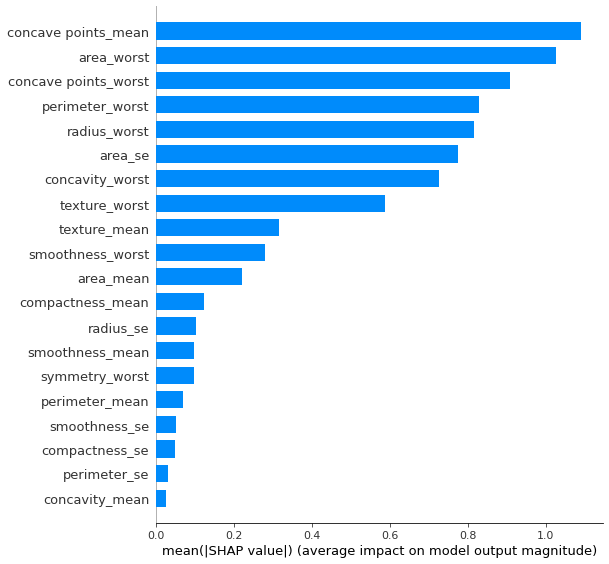

In [ ]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")

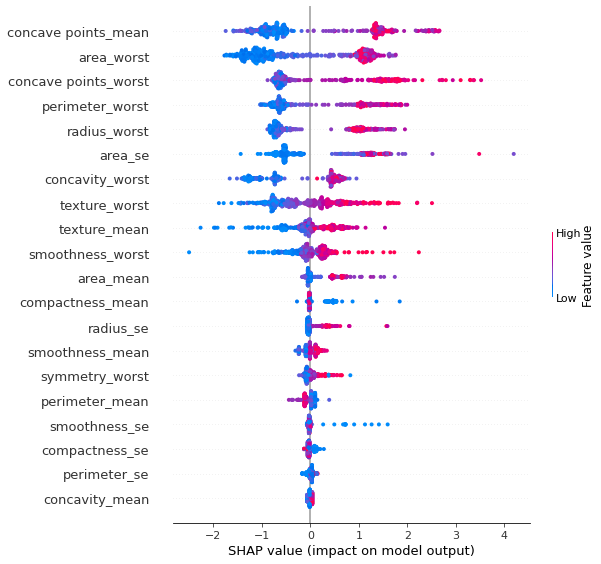

In [ ]:
shap.summary_plot(shap_vals, X_train)

### Como interpretamos o gráfico de resumo do SHAP?

- No eixo y temos as features, ordenadas por importância;

- No eixo x temos os SHAP values -- valores positivos estão positivamente associados com o target 1, e vice-versa;

- Cada ponto é uma observação do dataset original;

- As cores estão associadas com os tamanhos (valor absoluto) da respectiva feature pra cada observação;

____
____
____